<a href="https://colab.research.google.com/github/BojanKomazec/tensorflow-demo-notebooks/blob/main/Simple_linear_regression_with_single_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
#
# Create x and y values for datapoints
#

dataset_x = np.linspace(-1, 1, 100)
print(f'dataset_x.shape = {dataset_x.shape}')

# Our model will need to learn these values
SLOPE = 2
INTERCEPT = -1

rng = np.random.default_rng()
dataset_y = ((SLOPE * dataset_x) + INTERCEPT) + rng.standard_normal(*dataset_x.shape) * 0.33

dataset_x.shape = (100,)


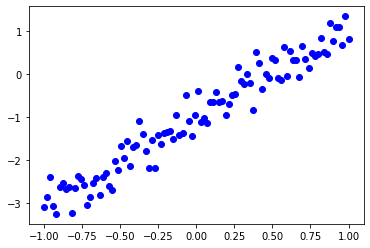

In [3]:
#
# (Optional)
# Plot data points
#

plt.plot(dataset_x, dataset_y, 'bo')
plt.show()

In [4]:
#
# Create a training and test datasets
#

dataset = list(zip(dataset_x, dataset_y))
print(f'dataset = {dataset}') # list of (x, y) tuples

# Pandas dataframe
df_dataset = pd.DataFrame.from_records(dataset, columns = ['x', 'y'] )

dataset_train = df_dataset.sample(frac=0.8, random_state=0)
print(f'dataset_train.shape = {dataset_train.shape}')
dataset_test = df_dataset.drop(dataset_train.index)
print(f'dataset_test.shape = {dataset_test.shape}')

dataset = [(-1.0, -3.088159998477962), (-0.9797979797979798, -2.845838056348139), (-0.9595959595959596, -2.3832040424647274), (-0.9393939393939394, -3.0555410343814917), (-0.9191919191919192, -3.243221571406082), (-0.898989898989899, -2.6178777702065235), (-0.8787878787878788, -2.529139808276099), (-0.8585858585858586, -2.6697659733780505), (-0.8383838383838383, -2.627892090455329), (-0.8181818181818181, -3.216596603842743), (-0.797979797979798, -2.64186475535555), (-0.7777777777777778, -2.3639551963186545), (-0.7575757575757576, -2.4259490612670844), (-0.7373737373737373, -2.569391620097975), (-0.7171717171717171, -3.0364034504366155), (-0.696969696969697, -2.8416703127613596), (-0.6767676767676767, -2.5183971908930536), (-0.6565656565656566, -2.4078022620059136), (-0.6363636363636364, -2.8122924733975814), (-0.6161616161616161, -2.376854297533117), (-0.5959595959595959, -2.294091239647782), (-0.5757575757575757, -2.5861930911015), (-0.5555555555555556, -2.6841482576333955), (-0.53535

In [5]:
#
# Build a model with a single neuron
#

model = tf.keras.Sequential([
    layers.Dense(input_shape=(1,), units=1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [6]:
#
# Define function which plots a scatter graph of dataset datapoints and a line
# defined with its (x, y) datapoints.
#

def plot_fn(dataset_x, dataset_y, x, y):
  plt.plot(dataset_x, dataset_y, 'bo', label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.show()

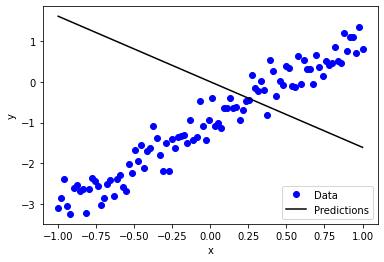

In [8]:
#
# (Optional)
# Check the output of the untrained model
#

y = model.predict(dataset_x)
plot_fn(dataset_x, dataset_y, dataset_x, y)

In [9]:
#
# Compile the model
#
# This sets:
# - loss function e.g. Mean Absolute Error or Mean Squared Error
# - optimization algorithm e.g. Adam or Stochastic Gradient Descent and its
#.  arguments e.g. learning rate for Gradient Descent
#

learning_rate = 0.1
optimizer=tf.optimizers.Adam(learning_rate=learning_rate)
# optimizer=tf.optimizers.SGD(learning_rate=learning_rate)

model.compile(
    optimizer=optimizer,
    loss='mean_absolute_error')

In [10]:
%%time
history = model.fit(
    dataset_train['x'], dataset_train['y'],
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 1.91 s, sys: 63 ms, total: 1.98 s
Wall time: 2.2 s


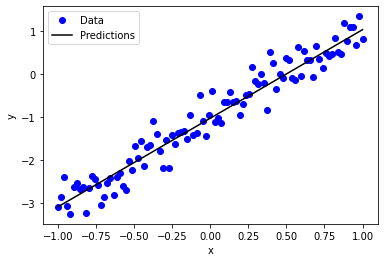

In [11]:
# 
# Plot the final function approximation
#

y = model.predict(dataset_x)
plot_fn(dataset_x, dataset_y, dataset_x, y)

In [17]:
#
# Print the values of learned and original model parameters.
#

# Check out the weights' values of the trained model
for layer in model.layers: print(layer.get_config(), layer.get_weights())

first_layer_weights = model.layers[0].get_weights()[0]
first_layer_biases  = model.layers[0].get_weights()[1]

print(f'Learned slope is {first_layer_weights[0]} while original is {SLOPE}')
print(f'Learned intercept is {first_layer_biases[0]} while original is {INTERCEPT}')

{'name': 'dense', 'trainable': True, 'batch_input_shape': (None, 1), 'dtype': 'float32', 'units': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[2.0583515]], dtype=float32), array([-1.0173998], dtype=float32)]
Learned slope is [2.0583515] while original is 2
Learned intercept is -1.017399787902832 while original is -1
